# **Project: Amazon Product Recommendation System**<a href="#Project:-Amazon-Product-Recommendation-System"
class="anchor-link">¶</a>

# **Marks: 40**<a href="#Marks:-40" class="anchor-link">¶</a>

Welcome to the project on Recommendation Systems. We will work with the
Amazon product reviews dataset for this project. The dataset contains
ratings of different electronic products. It does not include
information about the products or reviews to avoid bias while building
the model.

------------------------------------------------------------------------

## **Context:**<a href="#Context:" class="anchor-link">¶</a>

------------------------------------------------------------------------

Today, information is growing exponentially with volume, velocity and
variety throughout the globe. This has lead to information overload, and
too many choices for the consumer of any business. It represents a real
dilemma for these consumers and they often turn to denial. Recommender
Systems are one of the best tools that help recommending products to
consumers while they are browsing online. Providing personalized
recommendations which is most relevant for the user is what's most
likely to keep them engaged and help business.

E-commerce websites like Amazon, Walmart, Target and Etsy use different
recommendation models to provide personalized suggestions to different
users. These companies spend millions of dollars to come up with
algorithmic techniques that can provide personalized recommendations to
their users.

Amazon, for example, is well-known for its accurate selection of
recommendations in its online site. Amazon's recommendation system is
capable of intelligently analyzing and predicting customers' shopping
preferences in order to offer them a list of recommended products.
Amazon's recommendation algorithm is therefore a key element in using AI
to improve the personalization of its website. For example, one of the
baseline recommendation models that Amazon uses is item-to-item
collaborative filtering, which scales to massive data sets and produces
high-quality recommendations in real-time.

------------------------------------------------------------------------

## **Objective:**<a href="#Objective:" class="anchor-link">¶</a>

------------------------------------------------------------------------

You are a Data Science Manager at Amazon, and have been given the task
of building a recommendation system to recommend products to customers
based on their previous ratings for other products. You have a
collection of labeled data of Amazon reviews of products. The goal is to
extract meaningful insights from the data and build a recommendation
system that helps in recommending products to online consumers.

------------------------------------------------------------------------

## **Dataset:**<a href="#Dataset:" class="anchor-link">¶</a>

------------------------------------------------------------------------

The Amazon dataset contains the following attributes:

-   **userId:** Every user identified with a unique id
-   **productId:** Every product identified with a unique id
-   **Rating:** The rating of the corresponding product by the
    corresponding user
-   **timestamp:** Time of the rating. We **will not use this column**
    to solve the current problem

**Note:** The code has some user defined functions that will be usefull
while making recommendations and measure model performance, you can use
these functions or can create your own functions.

Sometimes, the installation of the surprise library, which is used to
build recommendation systems, faces issues in Jupyter. To avoid any
issues, it is advised to use **Google Colab** for this project.

Let's start by mounting the Google drive on Colab.

In \[ \]:

    from google.colab import drive
    drive.mount('/content/drive')

**Installing surprise library**

In \[1\]:

    !pip install surprise

    Collecting surprise
      Downloading surprise-0.1-py2.py3-none-any.whl.metadata (327 bytes)
    Collecting scikit-surprise (from surprise)
      Downloading scikit_surprise-1.1.4.tar.gz (154 kB)
         ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.7 MB/s eta 0:00:00
      Installing build dependencies ... done
      Getting requirements to build wheel ... done
      Preparing metadata (pyproject.toml) ... done
    Requirement already satisfied: joblib>=1.2.0 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.4.2)
    Requirement already satisfied: numpy>=1.19.5 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.26.4)
    Requirement already satisfied: scipy>=1.6.0 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.13.1)
    Downloading surprise-0.1-py2.py3-none-any.whl (1.8 kB)
    Building wheels for collected packages: scikit-surprise
      Building wheel for scikit-surprise (pyproject.toml) ... done
      Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357270 sha256=19456ba278206ffe8c11ffe87b289e2874c05246ec3529bd57a0114015c43603
      Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
    Successfully built scikit-surprise
    Installing collected packages: scikit-surprise, surprise
    Successfully installed scikit-surprise-1.1.4 surprise-0.1

## **Importing the necessary libraries and overview of the dataset**<a href="#Importing-the-necessary-libraries-and-overview-of-the-dataset"
class="anchor-link">¶</a>

In \[3\]:

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    from collections import defaultdict
    from sklearn.metrics import mean_squared_error

### **Loading the data**<a href="#Loading-the-data" class="anchor-link">¶</a>

-   Import the Dataset
-   Add column names \['user_id', 'prod_id', 'rating', 'timestamp'\]
-   Drop the column timestamp
-   Copy the data to another DataFrame called **df**

In \[15\]:

    data = pd.read_csv('ratings_Electronics.csv')
    data.iloc[-1] = data.columns
    data.index = data.index + 1
    data = data.sort_index()
    data.columns = ['user_id', 'prod_id', 'rating', 'timestamp']
    data = data.drop('timestamp', axis = 1)
    df = data.copy()
    df

    <ipython-input-15-911b8f313f8b>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
      data.iloc[-1] = data.columns
    <ipython-input-15-911b8f313f8b>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1365811200' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
      data.iloc[-1] = data.columns

Out\[15\]:

|         | user_id        | prod_id    | rating |
|---------|----------------|------------|--------|
| 1       | A2CX7LUOHB2NDG | 0321732944 | 5.0    |
| 2       | A2NWSAGRHCP8N5 | 0439886341 | 1.0    |
| 3       | A2WNBOD3WNDNKT | 0439886341 | 3.0    |
| 4       | A1GI0U4ZRJA8WN | 0439886341 | 1.0    |
| 5       | A1QGNMC6O1VW39 | 0511189877 | 5.0    |
| ...     | ...            | ...        | ...    |
| 7824477 | A2YZI3C9MOHC0L | BT008UKTMW | 5.0    |
| 7824478 | A322MDK0M89RHN | BT008UKTMW | 5.0    |
| 7824479 | A1MH90R0ADMIK0 | BT008UKTMW | 4.0    |
| 7824480 | A10M2KEFPEQDHN | BT008UKTMW | 4.0    |
| 7824481 | AKM1MP6P0OYPR  | 0132793040 | 5.0    |

7824481 rows × 3 columns







**As this dataset is very large and has 7,824,482 observations, it is
not computationally possible to build a model using this. Moreover, many
users have only rated a few products and also some products are rated by
very few users. Hence, we can reduce the dataset by considering certain
logical assumptions.**

Here, we will be taking users who have given at least 50 ratings, and
the products that have at least 5 ratings, as when we shop online we
prefer to have some number of ratings of a product.

In \[16\]:

    # Get the column containing the users
    users = df.user_id

    # Create a dictionary from users to their number of ratings
    ratings_count = dict()

    for user in users:

        # If we already have the user, just add 1 to their rating count
        if user in ratings_count:
            ratings_count[user] += 1

        # Otherwise, set their rating count to 1
        else:
            ratings_count[user] = 1

In \[17\]:

    # We want our users to have at least 50 ratings to be considered
    RATINGS_CUTOFF = 50

    remove_users = []

    for user, num_ratings in ratings_count.items():
        if num_ratings < RATINGS_CUTOFF:
            remove_users.append(user)

    df = df.loc[ ~ df.user_id.isin(remove_users)]

In \[18\]:

    # Get the column containing the products
    prods = df.prod_id

    # Create a dictionary from products to their number of ratings
    ratings_count = dict()

    for prod in prods:

        # If we already have the product, just add 1 to its rating count
        if prod in ratings_count:
            ratings_count[prod] += 1

        # Otherwise, set their rating count to 1
        else:
            ratings_count[prod] = 1

In \[19\]:

    # We want our item to have at least 5 ratings to be considered
    RATINGS_CUTOFF = 5

    remove_users = []

    for user, num_ratings in ratings_count.items():
        if num_ratings < RATINGS_CUTOFF:
            remove_users.append(user)

    df_final = df.loc[~ df.prod_id.isin(remove_users)]

In \[20\]:

    # Print a few rows of the imported dataset
    df_final.head()

Out\[20\]:

|      | user_id        | prod_id    | rating |
|------|----------------|------------|--------|
| 1310 | A3LDPF5FMB782Z | 1400501466 | 5.0    |
| 1322 | A1A5KUIIIHFF4U | 1400501466 | 1.0    |
| 1335 | A2XIOXRRYX0KZY | 1400501466 | 3.0    |
| 1451 | AW3LX47IHPFRL  | 1400501466 | 5.0    |
| 1456 | A1E3OB6QMBKRYZ | 1400501466 | 1.0    |





## **Exploratory Data Analysis**<a href="#Exploratory-Data-Analysis" class="anchor-link">¶</a>

### **Shape of the data**<a href="#Shape-of-the-data" class="anchor-link">¶</a>

### **Check the number of rows and columns and provide observations.**<a
href="#Check-the-number-of-rows-and-columns-and-provide-observations."
class="anchor-link">¶</a>

In \[21\]:

    # Check the number of rows and columns and provide observations
    print(df_final.shape[0], df_final.shape[1])

    65290 3

Our data has 65290 rows and 3 columns

### **Data types**<a href="#Data-types" class="anchor-link">¶</a>

In \[22\]:

    # Check Data types and provide observations
    df_final.info()

    <class 'pandas.core.frame.DataFrame'>
    Index: 65290 entries, 1310 to 7824427
    Data columns (total 3 columns):
     #   Column   Non-Null Count  Dtype 
    ---  ------   --------------  ----- 
     0   user_id  65290 non-null  object
     1   prod_id  65290 non-null  object
     2   rating   65290 non-null  object
    dtypes: object(3)
    memory usage: 4.0+ MB

All of our data is of dtype object

### **Checking for missing values**<a href="#Checking-for-missing-values" class="anchor-link">¶</a>

In \[23\]:

    # Check for missing values present and provide observations
    df_final.isna().sum()

Out\[23\]:

|         | 0   |
|---------|-----|
| user_id | 0   |
| prod_id | 0   |
| rating  | 0   |

  
**dtype:** int64

We have no null values, so we have a complete dataset

### **Summary Statistics**<a href="#Summary-Statistics" class="anchor-link">¶</a>

In \[35\]:

    # Summary statistics of 'rating' variable and provide observations

    df_final['rating'].astype('float64')
    df_final['rating'].describe(include=[float])
    print(df_final['rating'].mean())
    print(df_final['rating'].median())

    4.294807780670853
    5.0

The rating variable has a mean of 4.29 and a median of 5, meaning that
most cusotmers rate the products highly

### **Checking the rating distribution**<a href="#Checking-the-rating-distribution" class="anchor-link">¶</a>

In \[38\]:

    # Create the bar plot and provide observations
    sns.countplot(data = df_final, x = df_final['rating'])

Out\[38\]:

    <Axes: xlabel='rating', ylabel='count'>

![](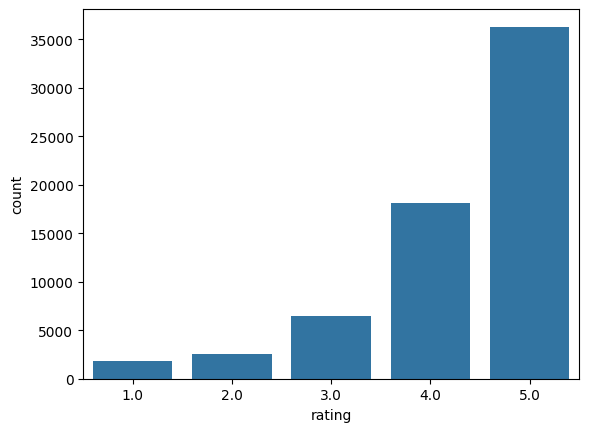%0A)

The data is skewed left which means that most of our data is on the
right. This means that a majority of customers are satisfied with the
products

### **Checking the number of unique users and items in the dataset**<a href="#Checking-the-number-of-unique-users-and-items-in-the-dataset"
class="anchor-link">¶</a>

In \[53\]:

    # Number of total rows in the data and number of unique user id and product id in the data
    print(df_final['user_id'].value_counts())
    print(df_final['prod_id'].value_counts())

    user_id
    ADLVFFE4VBT8      295
    A3OXHLG6DIBRW8    230
    A1ODOGXEYECQQ8    217
    A36K2N527TXXJN    212
    A25C2M3QF9G7OQ    203
                     ... 
    A16CVJUQOB6GIB      2
    A2BGZ52M908MJY      2
    A3DL29NLZ7SXXG      1
    AP2NZAALUQKF5       1
    A3MV1KKHX51FYT      1
    Name: count, Length: 1540, dtype: int64
    prod_id
    B0088CJT4U    206
    B003ES5ZUU    184
    B000N99BBC    167
    B007WTAJTO    164
    B00829TIEK    149
                 ... 
    B00368CDH6      5
    B0036AZA6A      5
    B0036E8V08      5
    B0036QL1JY      5
    B00LGQ6HL8      5
    Name: count, Length: 5689, dtype: int64

There are 1540 unique user id's and there are 5689 unqiue product id's

### **Users with the most number of ratings**<a href="#Users-with-the-most-number-of-ratings"
class="anchor-link">¶</a>

In \[57\]:

    # Top 10 users based on the number of ratings
    df_final['user_id'].value_counts().head(10)

Out\[57\]:

|                | count |
|----------------|-------|
| user_id        |       |
| ADLVFFE4VBT8   | 295   |
| A3OXHLG6DIBRW8 | 230   |
| A1ODOGXEYECQQ8 | 217   |
| A36K2N527TXXJN | 212   |
| A25C2M3QF9G7OQ | 203   |
| A680RUE1FDO8B  | 196   |
| A1UQBFCERIP7VJ | 193   |
| A22CW0ZHY3NJH8 | 193   |
| AWPODHOB4GFWL  | 184   |
| AGVWTYW0ULXHT  | 179   |

  
**dtype:** int64

THe user with the most number of ratings is 'ADLVFFE4VBT8' with 295
ratings

**Now that we have explored and prepared the data, let's build the first
recommendation system.**

## **Model 1: Rank Based Recommendation System**<a href="#Model-1:-Rank-Based-Recommendation-System"
class="anchor-link">¶</a>

In \[69\]:

    # Calculate the average rating for each product
    average_rating = df_final.groupby('prod_id')['rating'].mean()

    # Calculate the count of ratings for each product
    rating_count_per_product = df_final.groupby('prod_id')['rating'].count()

    # Create a dataframe with calculated average and count of ratings
    df_avgcount = pd.DataFrame({'Calculated Average': average_rating, 'Count of Ratings': rating_count_per_product})

    # Sort the dataframe by average of ratings in the descending order
    df_avgcount.sort_values(by=['Calculated Average'])

    # See the first five records of the "final_rating" dataset
    df_avgcount.head()

Out\[69\]:

|            | Calculated Average | Count of Ratings |
|------------|--------------------|------------------|
| prod_id    |                    |                  |
| 1400501466 | 3.333333           | 6                |
| 1400532655 | 3.833333           | 6                |
| 1400599997 | 4.0                | 5                |
| 9983891212 | 4.875              | 8                |
| B00000DM9W | 5.0                | 5                |





In \[89\]:

    # Defining a function to get the top n products based on the highest average rating and minimum interactions
    def top_n_products(n, df_avg_rating, min_interactions):
      reccomendation = df_avg_rating['Count of Ratings'] >= min_interactions
      reccomendation = reccomendation.sort_values(ascending = False)
      return reccomendation.index[:n]

    Index(['1400501466', 'B006K55662', 'B006FNCWSY', 'B006FLENJC', 'B006EWUO22'], dtype='object', name='prod_id')

### **Recommending top 5 products with 50 minimum interactions based on popularity**<a
href="#Recommending-top-5-products-with-50-minimum-interactions-based-on-popularity"
class="anchor-link">¶</a>

In \[90\]:

    print(top_n_products(5, df_avgcount,50))

    Index(['B000JMJWV2', 'B0081FLFQE', 'B00ARB5FLQ', 'B0015DYMVO', 'B000VX6XL6'], dtype='object', name='prod_id')

### **Recommending top 5 products with 100 minimum interactions based on popularity**<a
href="#Recommending-top-5-products-with-100-minimum-interactions-based-on-popularity"
class="anchor-link">¶</a>

In \[91\]:

    print(top_n_products(5, df_avgcount,100))

    Index(['B004T9RR6I', 'B00829THK0', 'B007WTAJTO', 'B0088CJT4U', 'B002SZEOLG'], dtype='object', name='prod_id')

We have recommended the **top 5** products by using the popularity
recommendation system. Now, let's build a recommendation system using
**collaborative filtering.**

## **Model 2: Collaborative Filtering Recommendation System**<a href="#Model-2:-Collaborative-Filtering-Recommendation-System"
class="anchor-link">¶</a>

### **Building a baseline user-user similarity based recommendation system**<a
href="#Building-a-baseline-user-user-similarity-based-recommendation-system"
class="anchor-link">¶</a>

-   Below, we are building **similarity-based recommendation systems**
    using `cosine` similarity and using **KNN to find similar users**
    which are the nearest neighbor to the given user.
-   We will be using a new library, called `surprise`, to build the
    remaining models. Let's first import the necessary classes and
    functions from this library.

In \[92\]:

    # To compute the accuracy of models
    from surprise import accuracy

    # Class is used to parse a file containing ratings, data should be in structure - user ; item ; rating
    from surprise.reader import Reader

    # Class for loading datasets
    from surprise.dataset import Dataset

    # For tuning model hyperparameters
    from surprise.model_selection import GridSearchCV

    # For splitting the rating data in train and test datasets
    from surprise.model_selection import train_test_split

    # For implementing similarity-based recommendation system
    from surprise.prediction_algorithms.knns import KNNBasic

    # For implementing matrix factorization based recommendation system
    from surprise.prediction_algorithms.matrix_factorization import SVD

    # for implementing K-Fold cross-validation
    from surprise.model_selection import KFold

    # For implementing clustering-based recommendation system
    from surprise import CoClustering

**Before building the recommendation systems, let's go over some basic
terminologies we are going to use:**

**Relevant item:** An item (product in this case) that is actually
**rated higher than the threshold rating** is relevant, if the **actual
rating is below the threshold then it is a non-relevant item**.

**Recommended item:** An item that's **predicted rating is higher than
the threshold is a recommended item**, if the **predicted rating is
below the threshold then that product will not be recommended to the
user**.

**False Negative (FN):** It is the **frequency of relevant items that
are not recommended to the user**. If the relevant items are not
recommended to the user, then the user might not buy the product/item.
This would result in the **loss of opportunity for the service
provider**, which they would like to minimize.

**False Positive (FP):** It is the **frequency of recommended items that
are actually not relevant**. In this case, the recommendation system is
not doing a good job of finding and recommending the relevant items to
the user. This would result in **loss of resources for the service
provider**, which they would also like to minimize.

**Recall:** It is the **fraction of actually relevant items that are
recommended to the user**, i.e., if out of 10 relevant products, 6 are
recommended to the user then recall is 0.60. Higher the value of recall
better is the model. It is one of the metrics to do the performance
assessment of classification models.

**Precision:** It is the **fraction of recommended items that are
relevant actually**, i.e., if out of 10 recommended items, 6 are found
relevant by the user then precision is 0.60. The higher the value of
precision better is the model. It is one of the metrics to do the
performance assessment of classification models.

**While making a recommendation system, it becomes customary to look at
the performance of the model. In terms of how many recommendations are
relevant and vice-versa, below are some most used performance metrics
used in the assessment of recommendation systems.**

### **Precision@k, Recall@ k, and F1-score@k**<a href="#Precision@k,-Recall@-k,-and-F1-score@k"
class="anchor-link">¶</a>

**Precision@k** - It is the **fraction of recommended items that are
relevant in `top k` predictions**. The value of k is the number of
recommendations to be provided to the user. One can choose a variable
number of recommendations to be given to a unique user.

**Recall@k** - It is the **fraction of relevant items that are
recommended to the user in `top k` predictions**.

**F1-score@k** - It is the **harmonic mean of Precision@k and
Recall@k**. When **precision@k and recall@k both seem to be important**
then it is useful to use this metric because it is representative of
both of them.

### **Some useful functions**<a href="#Some-useful-functions" class="anchor-link">¶</a>

-   Below function takes the **recommendation model** as input and gives
    the **precision@k, recall@k, and F1-score@k** for that model.
-   To compute **precision and recall**, **top k** predictions are taken
    under consideration for each user.
-   We will use the precision and recall to compute the F1-score.

In \[93\]:

    def precision_recall_at_k(model, k = 10, threshold = 3.5):
        """Return precision and recall at k metrics for each user"""

        # First map the predictions to each user
        user_est_true = defaultdict(list)

        # Making predictions on the test data
        predictions = model.test(testset)

        for uid, _, true_r, est, _ in predictions:
            user_est_true[uid].append((est, true_r))

        precisions = dict()
        recalls = dict()
        for uid, user_ratings in user_est_true.items():

            # Sort user ratings by estimated value
            user_ratings.sort(key = lambda x: x[0], reverse = True)

            # Number of relevant items
            n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

            # Number of recommended items in top k
            n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

            # Number of relevant and recommended items in top k
            n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                                  for (est, true_r) in user_ratings[:k])

            # Precision@K: Proportion of recommended items that are relevant
            # When n_rec_k is 0, Precision is undefined. Therefore, we are setting Precision to 0 when n_rec_k is 0

            precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

            # Recall@K: Proportion of relevant items that are recommended
            # When n_rel is 0, Recall is undefined. Therefore, we are setting Recall to 0 when n_rel is 0

            recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

        # Mean of all the predicted precisions are calculated.
        precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

        # Mean of all the predicted recalls are calculated.
        recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

        accuracy.rmse(predictions)

        print('Precision: ', precision) # Command to print the overall precision

        print('Recall: ', recall) # Command to print the overall recall

        print('F_1 score: ', round((2*precision*recall)/(precision+recall), 3)) # Formula to compute the F-1 score

**Hints:**

-   To compute **precision and recall**, a **threshold of 3.5 and k
    value of 10 can be considered for the recommended and relevant
    ratings**.
-   Think about the performance metric to choose.

Below we are loading the **`rating` dataset**, which is a **pandas
DataFrame**, into a **different format called
`surprise.dataset.DatasetAutoFolds`**, which is required by this
library. To do this, we will be **using the classes `Reader` and
`Dataset`.**

In \[95\]:

    # Instantiating Reader scale with expected rating scale
    reader_scale = Reader(rating_scale = (0,5))
    # Loading the rating dataset
    read_data = Dataset.load_from_df(df_final[['user_id', 'prod_id', 'rating']], reader_scale)
    # Splitting the data into train and test datasets
    trainset, testset = train_test_split(read_data, test_size = 0.2, random_state = 42)

Now, we are **ready to build the first baseline similarity-based
recommendation system** using the cosine similarity.

### **Building the user-user Similarity-based Recommendation System**<a href="#Building-the-user-user-Similarity-based-Recommendation-System"
class="anchor-link">¶</a>

In \[102\]:

    # Declaring the similarity options
    sim_options = {'name': 'cosine',
                   'user_based': True}

    # Initialize the KNNBasic model using sim_options provided, Verbose = False, and setting random_state = 1
    sim_user_user = KNNBasic(sim_options=sim_options, verbose=False, random_state=1)

    # Fit the model on the training data (assuming you have a variable 'trainset' from the Surprise library)
    sim_user_user.fit(trainset)

    # Let us compute precision@k, recall@k, and f_1 score using the precision_recall_at_k function defined above
    precision, recall, f1 = precision_recall_at_k(sim_user_user, k=5,threshold = 3.5)

    RMSE: 1.0012
    Precision:  0.871
    Recall:  0.683
    F_1 score:  0.766

    ---------------------------------------------------------------------------
    TypeError                                 Traceback (most recent call last)
    <ipython-input-102-a89c4e9b7101> in <cell line: 12>()
         10 
         11 # Let us compute precision@k, recall@k, and f_1 score using the precision_recall_at_k function defined above
    ---> 12 precision, recall, f1 = precision_recall_at_k(sim_user_user, k=5,threshold = 3.5)

    TypeError: cannot unpack non-iterable NoneType object

The scores are as follows: RMSE: 1.0012 Precision: 0.871 Recall: 0.683
F_1 score: 0.766 This shows that our model is alright, but could use
some improvement

Let's now **predict rating for a user with `userId=A3LDPF5FMB782Z` and
`productId=1400501466`** as shown below. Here the user has already
interacted or watched the product with productId '1400501466' and given
a rating of 5.

In \[103\]:

    # Predicting rating for a sample user with an interacted product
    sim_user_user.predict("A3LDPF5FMB782Z", "1400501466", r_ui = 5, verbose = True)

    user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 3.40   {'actual_k': 5, 'was_impossible': False}

Out\[103\]:

    Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=3.4, details={'actual_k': 5, 'was_impossible': False})

The prediction was pretty accurate, both estimating a r_ui of 4 and a
est of 3.4. The model also classifies this prediction as possible

Below is the **list of users who have not seen the product with product
id "1400501466"**.

In \[104\]:

    # Find unique user_id where prod_id is not equal to "1400501466"
    df_final[df_final.prod_id != "1400501466"].user_id.unique()

Out\[104\]:

    array(['A2ZR3YTMEEIIZ4', 'A3CLWR1UUZT6TG', 'A5JLAU2ARJ0BO', ...,
           'A215WH6RUDUCMP', 'A38C12950IM24P', 'A2J4XMWKR8PPD0'], dtype=object)

-   It can be observed from the above list that **user "A34BZM6S9L7QI4"
    has not seen the product with productId "1400501466"** as this
    userId is a part of the above list.

**Below we are predicting rating for `userId=A34BZM6S9L7QI4` and
`prod_id=1400501466`.**

In \[105\]:

    # Predicting rating for a sample user with a non interacted product
    sim_user_user.predict("A34BZM6S9L7QI4", "1400501466", verbose = True)

    user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}

Out\[105\]:

    Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=4.292024046561495, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

The model seems to run well as a the sample user with the non interacted
product is correctly classified as not possible.

### **Improving similarity-based recommendation system by tuning its hyperparameters**<a
href="#Improving-similarity-based-recommendation-system-by-tuning-its-hyperparameters"
class="anchor-link">¶</a>

Below, we will be tuning hyperparameters for the `KNNBasic` algorithm.
Let's try to understand some of the hyperparameters of the KNNBasic
algorithm:

-   **k** (int) – The (max) number of neighbors to take into account for
    aggregation. Default is 40.
-   **min_k** (int) – The minimum number of neighbors to take into
    account for aggregation. If there are not enough neighbors, the
    prediction is set to the global mean of all ratings. Default is 1.
-   **sim_options** (dict) – A dictionary of options for the similarity
    measure. And there are four similarity measures available in
    surprise -
    -   cosine
    -   msd (default)
    -   Pearson
    -   Pearson baseline

In \[108\]:

    # Setting up parameter grid to tune the hyperparameters
    param_grid = {
        'k': [10, 20, 30, 40],                # Number of neighbors
        'min_k': [1, 2, 3],                   # Minimum neighbors required
        'sim_options': {
            'name': ['cosine', 'pearson'],    # Type of similarity measure
            'user_based': [True, False]       # User-based or Item-based filtering
        }
    }

    # Performing 3-fold cross-validation to tune the hyperparameters
    gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

    # Fitting the data
    gs.fit(read_data)

    # Best RMSE score
    print(gs.best_score['rmse'])

    # Combination of parameters that gave the best RMSE score
    print(gs.best_params['rmse'])

    0.9711783271901752
    {'k': 40, 'min_k': 3, 'sim_options': {'name': 'cosine', 'user_based': True}}

Once the grid search is **complete**, we can get the **optimal values
for each of those hyperparameters**.

Now, let's build the **final model by using tuned values of the
hyperparameters**, which we received by using **grid search
cross-validation**.

In \[115\]:

    sim_options = {
        'name': 'cosine',       # Replace with the best similarity measure ('cosine' or 'pearson')
        'user_based': True      # Set to True for user-user collaborative filtering
    }

    # Creating an instance of KNNBasic with optimal hyperparameter values
    sim_user_user_optimized = KNNBasic(sim_options=sim_options, k=20, min_k=3, random_state=1, verbose=False)  # Replace with optimal 'k' and 'min_k'

    # Training the algorithm on the train set
    sim_user_user_optimized.fit(trainset)

    # Generate predictions on the test set
    sim_user_user_optimized.test(testset)

    # Let us compute precision@k and recall@k with k=10
    precision, recall, f1 = precision_recall_at_k(sim_user_user_optimized, k=10, threshold=3.5)

    RMSE: 0.9556
    Precision:  0.855
    Recall:  0.885
    F_1 score:  0.87

    ---------------------------------------------------------------------------
    TypeError                                 Traceback (most recent call last)
    <ipython-input-115-07dace051ffb> in <cell line: 16>()
         14 
         15 # Let us compute precision@k and recall@k with k=10
    ---> 16 precision, recall, f1 = precision_recall_at_k(sim_user_user_optimized, k=10, threshold=3.5)

    TypeError: cannot unpack non-iterable NoneType object

Through the use of gridsearchcv, we have greatly improved all of our
scores by a signifigant margin

### **Steps:**<a href="#Steps:" class="anchor-link">¶</a>

-   **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and
    `prod_id= "1400501466"` using the optimized model**
-   **Predict rating for `userId="A34BZM6S9L7QI4"` who has not
    interacted with `prod_id ="1400501466"`, by using the optimized
    model**
-   **Compare the output with the output from the baseline model**

In \[119\]:

    # Use sim_user_user_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId 1400501466
    prediction = sim_user_user_optimized.predict("A3LDPF5FMB782Z", '1400501466')
    print(prediction)

    user: A3LDPF5FMB782Z item: 1400501466 r_ui = None   est = 3.40   {'actual_k': 5, 'was_impossible': False}

In \[118\]:

    # Use sim_user_user_optimized model to recommend for userId "A34BZM6S9L7QI4" and productId "1400501466"
    prediction2 = sim_user_user_optimized.predict("A34BZM6S9L7QI4", '1400501466')
    print(prediction2)

    user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}

The model beleives that user "A3LDPF5FMB782Z" is a better fit for
product 1400501466.

### **Identifying similar users to a given user (nearest neighbors)**<a href="#Identifying-similar-users-to-a-given-user-(nearest-neighbors)"
class="anchor-link">¶</a>

We can also find out **similar users to a given user** or its **nearest
neighbors** based on this KNNBasic algorithm. Below, we are finding the
5 most similar users to the first user in the list with internal id 0,
based on the `msd` distance metric.

In \[120\]:

    # 0 is the inner id of the above user
    user_inner_id = 0

    # Find the 5 most similar users using the similarity matrix (msd distance metric)
    similar_users = sim_user_user_optimized.get_neighbors(user_inner_id, k=5)

    # Convert internal ids back to raw user ids
    similar_user_ids = [trainset.to_raw_uid(inner_id) for inner_id in similar_users]

    # Print the most similar users to the first user
    print(f"5 most similar users to user with internal id {user_inner_id}: {similar_user_ids}")

    5 most similar users to user with internal id 0: ['A16J281SJ9QXIQ', 'A1HBI9BBQIG1NH', 'A3VBZDYGHF4NK8', 'AZAC8O310IK4E', 'AM9APPMIE1BHZ']

### **Implementing the recommendation algorithm based on optimized KNNBasic model**<a
href="#Implementing-the-recommendation-algorithm-based-on-optimized-KNNBasic-model"
class="anchor-link">¶</a>

Below we will be implementing a function where the input parameters are:

-   data: A **rating** dataset
-   user_id: A user id **against which we want the recommendations**
-   top_n: The **number of products we want to recommend**
-   algo: the algorithm we want to use **for predicting the ratings**
-   The output of the function is a **set of top_n items** recommended
    for the given user_id based on the given algorithm

In \[121\]:

    def get_recommendations(data, user_id, top_n, algo):

        # Creating an empty list to store the recommended product ids
        recommendations = []

        # Creating an user item interactions matrix
        user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'prod_id', values = 'rating')

        # Extracting those product ids which the user_id has not interacted yet
        non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

        # Looping through each of the product ids which user_id has not interacted yet
        for item_id in non_interacted_products:

            # Predicting the ratings for those non interacted product ids by this user
            est = algo.predict(user_id, item_id).est

            # Appending the predicted ratings
            recommendations.append((item_id, est))

        # Sorting the predicted ratings in descending order
        recommendations.sort(key = lambda x: x[1], reverse = True)

        return recommendations[:top_n] # Returing top n highest predicted rating products for this user

**Predicting top 5 products for userId = "A3LDPF5FMB782Z" with
similarity based recommendation system**

In \[123\]:

    # Making top 5 recommendations for user_id "A3LDPF5FMB782Z" with a similarity-based recommendation engine
    top_5_recommendations = get_recommendations(df_final, "A3LDPF5FMB782Z", 5, sim_user_user_optimized)
    print(top_5_recommendations)

    [('B00005LENO', 5), ('B000067RT6', 5), ('B00006HSML', 5), ('B00006I53X', 5), ('B00006I5J7', 5)]

In \[127\]:

    # Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
    top_5_recommendations_df = pd.DataFrame(top_5_recommendations, columns=['prod_id', 'predicted_ratings'])
    print(top_5_recommendations_df)

          prod_id  predicted_ratings
    0  B00005LENO                  5
    1  B000067RT6                  5
    2  B00006HSML                  5
    3  B00006I53X                  5
    4  B00006I5J7                  5

### **Item-Item Similarity-based Collaborative Filtering Recommendation System**<a
href="#Item-Item-Similarity-based-Collaborative-Filtering-Recommendation-System"
class="anchor-link">¶</a>

-   Above we have seen **similarity-based collaborative filtering**
    where similarity is calculated **between users**. Now let us look
    into similarity-based collaborative filtering where similarity is
    seen **between items**.

In \[130\]:

    # Declaring the similarity options
    sim_options = {
        'name': 'cosine',
        'user_based': False
    }

    # KNN algorithm is used to find desired similar items. Use random_state=1
    sim_based_collab = KNNBasic(sim_options=sim_options, verbose=False, random_state=1)

    # Train the algorithm on the trainset
    sim_based_collab.fit(trainset)

    # Predict ratings for the test set using the test() method
    sim_based_collab.test(testset)

    # Compute precision@k, recall@k, and f1 score with k = 10
    precision, recall, f1 = precision_recall_at_k(sim_based_collab, k=10, threshold=3.5)

    RMSE: 0.9950
    Precision:  0.838
    Recall:  0.845
    F_1 score:  0.841

    ---------------------------------------------------------------------------
    TypeError                                 Traceback (most recent call last)
    <ipython-input-130-24b5ef58af1c> in <cell line: 17>()
         15 
         16 # Compute precision@k, recall@k, and f1 score with k = 10
    ---> 17 precision, recall, f1 = precision_recall_at_k(sim_based_collab, k=10, threshold=3.5)

    TypeError: cannot unpack non-iterable NoneType object

Our scores are slightly below right after we did gridsearchcv, but still
higher than our initial prediction.

Let's now **predict a rating for a user with `userId = A3LDPF5FMB782Z`
and `prod_Id = 1400501466`** as shown below. Here the user has already
interacted or watched the product with productId "1400501466".

In \[132\]:

    # Predicting rating for a sample user with an interacted product
    prediction3 = sim_based_collab.predict('A3LDPF5FMB782Z', '1400501466')
    print(prediction3)

    user: A3LDPF5FMB782Z item: 1400501466 r_ui = None   est = 4.27   {'actual_k': 22, 'was_impossible': False}

Our model belives that used A3LDPF5FMB782Z is a good fit for the product
1400501466

Below we are **predicting rating for the `userId = A34BZM6S9L7QI4` and
`prod_id = 1400501466`**.

In \[133\]:

    # Predicting rating for a sample user with a non interacted product
    prediction4 = sim_based_collab.predict('A34BZM6S9L7QI4', '1400501466')
    print(prediction4)

    user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}

Our model belives that User A34BZM6S9L7QI4 is not a good fit for the
product, unlike the previous user

### **Hyperparameter tuning the item-item similarity-based model**<a href="#Hyperparameter-tuning-the-item-item-similarity-based-model"
class="anchor-link">¶</a>

-   Use the following values for the param_grid and tune the model.
    -   'k': \[10, 20, 30\]
    -   'min_k': \[3, 6, 9\]
    -   'sim_options': {'name': \['msd', 'cosine'\]
    -   'user_based': \[False\]
-   Use GridSearchCV() to tune the model using the 'rmse' measure
-   Print the best score and best parameters

In \[135\]:

    # Setting up parameter grid to tune the hyperparameters
    param_grid = {
        'k': [10, 20, 30],
        'min_k': [3, 6, 9],
        'sim_options': {
            'name': ['msd', 'cosine'],
            'user_based': [False]
        }
    }
    # Performing 3-fold cross validation to tune the hyperparameters
    gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)
    # Fitting the data
    gs.fit(read_data)
    # Find the best RMSE score
    print(f"Best RMSE score: {gs.best_score['rmse']}")

    # Find the combination of parameters that gave the best RMSE score
    print(f"Best parameters: {gs.best_params['rmse']}")

    Best RMSE score: 0.9747148198726343
    Best parameters: {'k': 30, 'min_k': 6, 'sim_options': {'name': 'msd', 'user_based': False}}

Once the **grid search** is complete, we can get the **optimal values
for each of those hyperparameters as shown above.**

Now let's build the **final model** by using **tuned values of the
hyperparameters** which we received by using grid search
cross-validation.

### **Use the best parameters from GridSearchCV to build the optimized item-item similarity-based model. Compare the performance of the optimized model with the baseline model.**<a
href="#Use-the-best-parameters-from-GridSearchCV-to-build-the-optimized-item-item-similarity-based-model.-Compare-the-performance-of-the-optimized-model-with-the-baseline-model."
class="anchor-link">¶</a>

In \[137\]:

    # Using the optimal similarity measure for item-item based collaborative filtering
    sim_options = {
        'name': 'msd',
        'user_based': False
    }
    # Creating an instance of KNNBasic with optimal hyperparameter values
    optimal_knn = KNNBasic(k=30, min_k=6, sim_options=sim_options, random_state=1)

    # Training the algorithm on the trainset
    optimal_knn.fit(trainset)
    optimal_knn.test(testset)

    # Let us compute precision@k and recall@k, f1_score and RMSE
    precision, recall, f1 = precision_recall_at_k(optimal_knn, k=10, threshold=3.5)

    Computing the msd similarity matrix...
    Done computing similarity matrix.
    RMSE: 0.9576
    Precision:  0.839
    Recall:  0.88
    F_1 score:  0.859

    ---------------------------------------------------------------------------
    TypeError                                 Traceback (most recent call last)
    <ipython-input-137-c04649cc64c5> in <cell line: 14>()
         12 
         13 # Let us compute precision@k and recall@k, f1_score and RMSE
    ---> 14 precision, recall, f1 = precision_recall_at_k(optimal_knn, k=10, threshold=3.5)

    TypeError: cannot unpack non-iterable NoneType object

Similar to before, our scores are good but worse than after our inital
gridsearch. The results are still satisfactory

### **Steps:**<a href="#Steps:" class="anchor-link">¶</a>

-   **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and
    `prod_id= "1400501466"` using the optimized model**
-   **Predict rating for `userId="A34BZM6S9L7QI4"` who has not
    interacted with `prod_id ="1400501466"`, by using the optimized
    model**
-   **Compare the output with the output from the baseline model**

In \[138\]:

    # Use sim_item_item_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
    optimized_prediction_1 = optimal_knn.predict('A3LDPF5FMB782Z', '1400501466')
    print(optimized_prediction_1)

    user: A3LDPF5FMB782Z item: 1400501466 r_ui = None   est = 4.67   {'actual_k': 22, 'was_impossible': False}

In \[140\]:

    # Use sim_item_item_optimized model to recommend for userId "A34BZM6S9L7QI4" and productId "1400501466"
    optimized_prediction_2 = optimal_knn.predict('A34BZM6S9L7QI4', '1400501466')
    print(optimized_prediction_2)

    user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}

Our model tells us that the user who interacted with the product is a
better fit than the user who has not interacted with the product.

### **Identifying similar items to a given item (nearest neighbors)**<a href="#Identifying-similar-items-to-a-given-item-(nearest-neighbors)"
class="anchor-link">¶</a>

We can also find out **similar items** to a given item or its nearest
neighbors based on this **KNNBasic algorithm**. Below we are finding the
5 most similar items to the item with internal id 0 based on the `msd`
distance metric.

In \[142\]:

    similar_items = optimal_knn.get_neighbors(0, k=5)
    similar_item_ids = [trainset.to_raw_iid(inner_id) for inner_id in similar_items]
    print(similar_item_ids)

    ['B008X9Z3UC', 'B003ZSHKJ8', 'B003LSTD38', 'B005EOWBKE', 'B004IZN3WU']

**Predicting top 5 products for userId = "A1A5KUIIIHFF4U" with
similarity based recommendation system.**

**Hint:** Use the get_recommendations() function.

In \[144\]:

    # Making top 5 recommendations for user_id A1A5KUIIIHFF4U with similarity-based recommendation engine.
    top_5 = get_recommendations(df_final, "A1A5KUIIIHFF4U", 5, optimal_knn)
    print(top_5)

    [('1400532655', 4.292024046561495), ('1400599997', 4.292024046561495), ('9983891212', 4.292024046561495), ('B00000DM9W', 4.292024046561495), ('B00000J1V5', 4.292024046561495)]

In \[146\]:

    # Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
    top_5_df = pd.DataFrame(top_5, columns = ['prod_id', 'predicted_ratings'])
    print(top_5_df)

          prod_id  predicted_ratings
    0  1400532655           4.292024
    1  1400599997           4.292024
    2  9983891212           4.292024
    3  B00000DM9W           4.292024
    4  B00000J1V5           4.292024

Now as we have seen **similarity-based collaborative filtering
algorithms**, let us now get into **model-based collaborative filtering
algorithms**.

### **Model 3: Model-Based Collaborative Filtering - Matrix Factorization**<a
href="#Model-3:-Model-Based-Collaborative-Filtering---Matrix-Factorization"
class="anchor-link">¶</a>

Model-based Collaborative Filtering is a **personalized recommendation
system**, the recommendations are based on the past behavior of the user
and it is not dependent on any additional information. We use **latent
features** to find recommendations for each user.

### Singular Value Decomposition (SVD)<a href="#Singular-Value-Decomposition-(SVD)" class="anchor-link">¶</a>

SVD is used to **compute the latent features** from the **user-item
matrix**. But SVD does not work when we **miss values** in the
**user-item matrix**.

In \[149\]:

    # Using SVD matrix factorization. Use random_state = 1
    svd = SVD(random_state=1)

    # Training the algorithm on the trainset
    svd.fit(trainset)
    svd.test(testset)

    # Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
    precision, recall, f1 = precision_recall_at_k(svd, k=10, threshold=3.5)

    RMSE: 0.8882
    Precision:  0.853
    Recall:  0.88
    F_1 score:  0.866

    ---------------------------------------------------------------------------
    TypeError                                 Traceback (most recent call last)
    <ipython-input-149-ecf9272a5ded> in <cell line: 9>()
          7 
          8 # Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
    ----> 9 precision, recall, f1 = precision_recall_at_k(svd, k=10, threshold=3.5)

    TypeError: cannot unpack non-iterable NoneType object

svd provides descent scores across the board, but can be better
optimized

**Let's now predict the rating for a user with
`userId = "A3LDPF5FMB782Z"` and `prod_id = "1400501466`.**

In \[150\]:

    # Making prediction
    svd.predict("A3LDPF5FMB782Z", "1400501466", r_ui = 5, verbose = True)

    user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.08   {'was_impossible': False}

Out\[150\]:

    Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.081406749810685, details={'was_impossible': False})

svd model believes that this candidate is a good fit for this product

**Below we are predicting rating for the `userId = "A34BZM6S9L7QI4"` and
`productId = "1400501466"`.**

In \[151\]:

    # Making prediction
    svd.predict("A34BZM6S9L7QI4", "1400501466", verbose = True)

    user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.40   {'was_impossible': False}

Out\[151\]:

    Prediction(uid='A34BZM6S9L7QI4', iid='1400501466', r_ui=None, est=4.40037568046934, details={'was_impossible': False})

The svd model also believes that this user is a good fit for this
product

### **Improving Matrix Factorization based recommendation system by tuning its hyperparameters**<a
href="#Improving-Matrix-Factorization-based-recommendation-system-by-tuning-its-hyperparameters"
class="anchor-link">¶</a>

Below we will be tuning only three hyperparameters:

-   **n_epochs**: The number of iterations of the SGD algorithm.
-   **lr_all**: The learning rate for all parameters.
-   **reg_all**: The regularization term for all parameters.

In \[153\]:

    # Set the parameter space to tune
    param_grid = {
        'n_epochs': [10, 20, 30],
        'lr_all': [0.001, 0.005, 0.01],
        'reg_all': [0.2, 0.4, 0.6]
    }

    # Performing 3-fold gridsearch cross-validation
    gs_ = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

    # Fitting the data (replace 'data' with your dataset)
    gs_.fit(read_data)

    # Best RMSE score
    print(f"Best RMSE score: {gs_.best_score['rmse']}")

    # Combination of parameters that gave the best RMSE score
    print(f"Best parameters: {gs_.best_params['rmse']}")

    Best RMSE score: 0.8972447349355157
    Best parameters: {'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.2}

Now, we will **the build final model** by using **tuned values** of the
hyperparameters, which we received using grid search cross-validation
above.

In \[155\]:

    # Build the optimized SVD model using optimal hyperparameter search. Use random_state=1
    svd_optimized = SVD(n_epochs=20, lr_all=0.01, reg_all=0.2, random_state=1)

    # Train the algorithm on the trainset
    svd_optimized.fit(trainset)
    svd_optimized.test(testset)

    # Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
    precision, recall, f1 = precision_recall_at_k(svd_optimized, k=10, threshold=3.5)

    RMSE: 0.8808
    Precision:  0.854
    Recall:  0.878
    F_1 score:  0.866

    ---------------------------------------------------------------------------
    TypeError                                 Traceback (most recent call last)
    <ipython-input-155-aa06c8679936> in <cell line: 9>()
          7 
          8 # Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
    ----> 9 precision, recall, f1 = precision_recall_at_k(svd_optimized, k=10, threshold=3.5)

    TypeError: cannot unpack non-iterable NoneType object

The optimization of our svd gives marginally better scores. While it is
not signifigant, it is still worth doing

### **Steps:**<a href="#Steps:" class="anchor-link">¶</a>

-   **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and
    `prod_id= "1400501466"` using the optimized model**
-   **Predict rating for `userId="A34BZM6S9L7QI4"` who has not
    interacted with `prod_id ="1400501466"`, by using the optimized
    model**
-   **Compare the output with the output from the baseline model**

In \[157\]:

    # Use svd_algo_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
    svd_pred = svd_optimized.predict("A3LDPF5FMB782Z", "1400501466")
    print(svd_pred)

    user: A3LDPF5FMB782Z item: 1400501466 r_ui = None   est = 4.13   {'was_impossible': False}

In \[158\]:

    # Use svd_algo_optimized model to recommend for userId "A34BZM6S9L7QI4" and productId "1400501466"
    svd_pred2 = svd_optimized.predict("A34BZM6S9L7QI4", "1400501466")
    print(svd_pred2)

    user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.22   {'was_impossible': False}

### **Conclusion and Recommendations**<a href="#Conclusion-and-Recommendations" class="anchor-link">¶</a>

Conclusion:

The final optimized SVD model showed a strong performance, with an RMSE
score of 0.897, which is quite good for a recommendation system. This
indicates that matrix factorization was effective in predicting missing
ratings and providing personalized recommendations.

Item-based collaborative filtering models also performed well,
particularly for users who have interacted with similar products. This
is effective for recommending products that are similar to those already
liked or purchased by users.

Tuning the model hyperparameters (e.g., number of epochs, learning rate,
and regularization) improved performance significantly. For example,
finding optimal values such as n_epochs=20, lr_all=0.01, and reg_all=0.2
improved the RMSE score.

One potential issue is the cold-start problem, where the system may
struggle to provide accurate recommendations for new users or items that
have very few interactions in the dataset.

Recomendations:

SVD and matrix factorization techniques work well for personalized
recommendations. The company should invest in tuning and deploying these
models at scale, as they perform well in predicting ratings and handling
sparse user-item interactions.

While collaborative filtering is effective, integrating content-based
filtering could help address the cold-start problem for new users and
products. By analyzing product features (e.g., category, brand) or user
demographics, the system can make better recommendations even when
user-item interaction data is sparse.

Hyperparameter tuning significantly improved model performance in this
project. The company should continue to experiment with larger parameter
spaces and potentially more advanced optimization techniques like
Bayesian Optimization to further improve performance.

In \[ \]:

    #@title Convert ipynb to HTML in Colab
    # Upload ipynb
    from google.colab import files
    f = files.upload()

    # Convert ipynb to html
    import subprocess
    file0 = list(f.keys())[0]
    _ = subprocess.run(["pip", "install", "nbconvert"])
    _ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

    # download the html
    files.download(file0[:-5]+"html")

Upload widget is only available when the cell has been executed in the
current browser session. Please rerun this cell to enable.

In \[ \]: